i

import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
gold_data = pd.read_csv("/content/gld_price_data.csv")
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
#missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

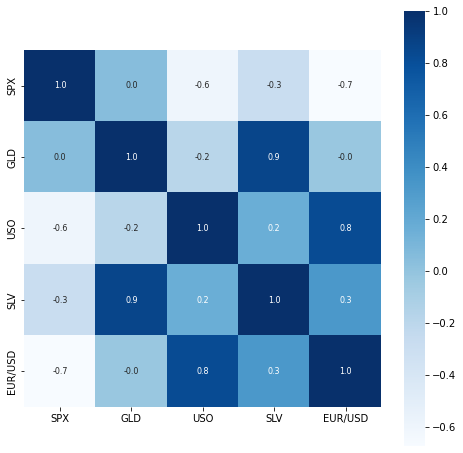

In [11]:
#to find corelation
c = gold_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(c,  cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Blues")

In [12]:
print(c["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


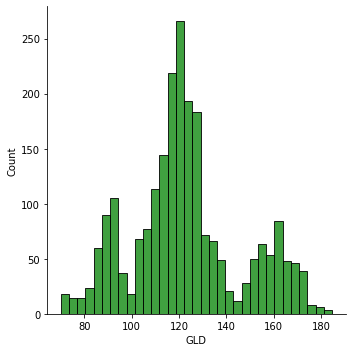

In [13]:
#to find spread of data element
sns.displot(gold_data["GLD"],color="green")

In [16]:
# to remove features
x = gold_data.drop(["Date","GLD"],axis=1)
y = gold_data["GLD"]
print(y)
print(x)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64
              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
#spliting data to training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
#RFS
regressor = RandomForestRegressor(n_estimators=100)
#Model Traing
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [24]:
#Model predection
t = regressor.predict(x_test)
print(t)

[168.17469958  82.18419993 116.01309958 127.65580094 120.82870126
 154.70459726 150.20729792 126.09809995 117.50129859 126.12280038
 116.80500084 171.69970062 141.42349858 167.77329847 115.22500006
 117.53380058 137.43960404 170.3185006  160.05780333 160.14690057
 155.21509985 125.30680037 175.44759975 157.4539038  125.1323006
  93.92339965  77.92160008 120.7574001  119.08579949 167.49209961
  88.23410026 125.15770033  91.23110058 117.54460036 121.01459923
 135.72210106 115.35570101 115.11080038 148.77800018 107.49130091
 103.96950227  87.11189776 126.49730072 117.78819978 153.26329866
 119.72880026 108.35419988 108.30699842  93.08830071 127.08619786
  75.04930049 113.64839908 121.14979993 111.16639888 118.7432987
 120.38729964 159.36339975 169.69950089 146.96329741  85.70289844
  94.40990018  86.9355985   90.48220016 119.04870111 126.43230068
 127.54220052 170.06339964 122.20039951 117.24329898  98.72379999
 167.348301   142.87219856 131.68090206 121.15820211 120.7015992
 119.92670074

In [25]:
#r squared error
e = metrics.r2_score(y_test,t)
print(e)

0.9896135630127029


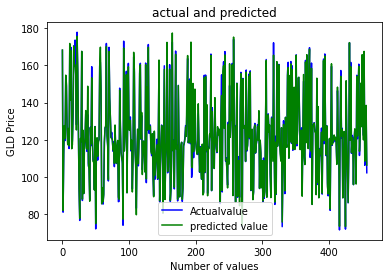

In [29]:
#compare actual values and predicted values in graph
y_test = list(y_test)
plt.plot(y_test,color="blue",label="Actualvalue")
plt.plot(t,color="green",label="predicted value")
plt.title("actual and predicted")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()
